In [1]:
import random
import os
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = "color"
IMG_SIZE = 224  # MobileNetV2 richiede input 224x224

# Carica e preprocessa l'immagine
def preprocess_image(img_path, target_size):
    img = Image.open(img_path)
    img = img.resize(target_size)  # Ridimensiona l'immagine
    img_array = np.array(img)  # Converte l'immagine in array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Aggiunge una dimensione per il batch
    img_array = img_array / 255.0  # Normalizza i pixel tra 0 e 1
    return img_array, img

def get_random_image():
    all_data_dir = os.path.join(DATA_DIR)  # Percorso alla directory principale
    classes = os.listdir(all_data_dir)  # Elenco delle sottodirectory (una per classe)
    
    # Creazione delle liste di percorsi dei file e delle rispettive etichette
    all_filepaths = []
    all_labels = []
    for label, class_dir in enumerate(classes):
        class_files = os.listdir(os.path.join(all_data_dir, class_dir))  # Tutti i file per una classe
        all_filepaths.extend([os.path.join(all_data_dir, class_dir, f) for f in class_files])  # Percorsi completi
        all_labels.extend([label] * len(class_files))  # Etichetta numerica corrispondente
    
    # Random Index
    idx = random.randint(0, len(all_filepaths) - 1)
    
    img_path = all_filepaths[idx]
    true_label = all_labels[idx]
    
    # Parametri di preprocessamento
    target_size = (224, 224)  # Dimensioni previste dal modello
    processed_img, image = preprocess_image(img_path, target_size)
    
    print(classes[true_label], true_label)
    
    return processed_img, true_label, classes, image

Potato___Early_blight 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Potato___Early_blight


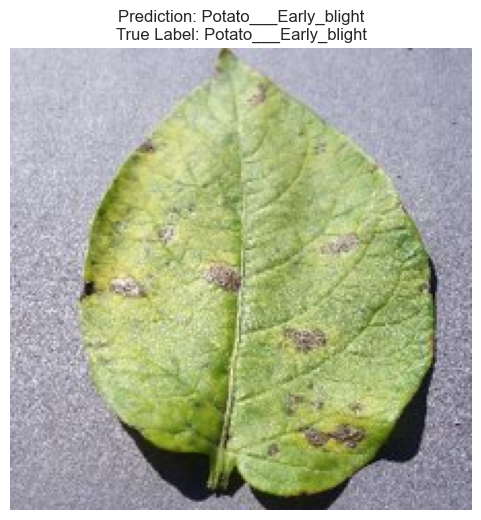

In [2]:
from tensorflow.keras.models import load_model

# Load the saved model (format .keras)
model_path = 'plant_disease_model_created.keras'
model = load_model(model_path)

img, true_label, class_names, image = get_random_image()
pred = model.predict(img)
predicted_class = class_names[np.argmax(pred)]

print(predicted_class)

# Result visualization
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"Prediction: {predicted_class}\nTrue Label: {class_names[true_label]}")
plt.axis('off')
plt.show()

In [3]:
all_data_dir = os.path.join(DATA_DIR)  # Percorso alla directory principale
classes = os.listdir(all_data_dir)  # Elenco delle sottodirectory (una per classe)

# load the model
test_image = tf.keras.utils.load_img('color/Peach___healthy/0a2ed402-5d23-4e8d-bc98-b264aea9c3fb___Rutg._HL 2471.JPG', target_size=(224, 224))
test_image = tf.keras.utils.img_to_array(test_image) / 255.0
test_image = tf.expand_dims(test_image, axis=0)

model = tf.keras.models.load_model('plant_disease_model_tuned.keras')
result = model.predict(test_image, batch_size=1)[0]
predicted_class = classes[np.argmax(result)]
print(predicted_class)

ValueError: File not found: filepath=plant_disease_model_tuned.keras. Please ensure the file is an accessible `.keras` zip file.